In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# read data into a DataFrame
data = pd.read_csv('bom_final_f.csv')

In [3]:
data.head()

,Title,plot,gross,distributor,budget,released_data,Field5,runtime,genre_1,genre_2,genre_3,genre_4,Unnamed: 12
0,Avengers: Endgame,After the devastating events of Avengers: Infi...,32839486,Walt Disney Studios Motion Pictures,356000000.0,4/24/2019,PG-13,181,Action,Adventure,Drama,Sci-Fi,NaN
1,Beauty and the Beast,A selfish prince is cursed to become a monster...,13501376,Walt Disney Studios Motion Pictures,160000000.0,3/16/2017,PG,129,Family,Fantasy,Musical,Romance,NaN
2,Spider-Man: Far from Home,"Following the events of Avengers: Endgame, Spi...",10578935,Sony Pictures Releasing,160000000.0,7/3/2019,PG-13,129,Action,Adventure,Sci-Fi,NaN,NaN
3,Jurassic World,"A new theme park, built on the original site o...",11121208,Universal Pictures International (UPI),150000000.0,6/10/2015,PG-13,124,Action,Adventure,Sci-Fi,NaN,NaN
4,The Twilight Saga: Eclipse,As a string of mysterious killings grips Seatt...,6317882,Pioneer Films,68000000.0,6/30/2010,PG-13,124,Action,Drama,Fantasy,Romance,NaN


**DATA CLEANING**

In [4]:
data['gross'].head()

0    32839486
1    13501376
2    10578935
3    11121208
4     6317882
Name: gross, dtype: int64

In [5]:
data['gross'].isna().sum() 

0

In [6]:
data.dtypes

Title             object
plot              object
gross              int64
distributor       object
budget           float64
released_data     object
Field5            object
runtime            int64
genre_1           object
genre_2           object
genre_3           object
genre_4           object
Unnamed: 12       object
dtype: object

In [7]:
data['released_data'] = pd.to_datetime(data['released_data'], errors='coerce')

In [8]:
data['released_data'].head()

0   2019-04-24
1   2017-03-16
2   2019-07-03
3   2015-06-10
4   2010-06-30
Name: released_data, dtype: datetime64[ns]

In [9]:
data['year_released'] = pd.DatetimeIndex(data['released_data']).year

In [10]:
data.dtypes

Title                    object
plot                     object
gross                     int64
distributor              object
budget                  float64
released_data    datetime64[ns]
Field5                   object
runtime                   int64
genre_1                  object
genre_2                  object
genre_3                  object
genre_4                  object
Unnamed: 12              object
year_released           float64
dtype: object

In [12]:
data['plot'].isna().sum() 

12

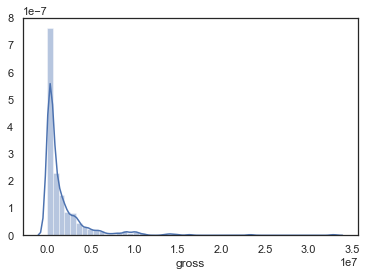

In [13]:
sns.distplot(data['gross'])

In [14]:
data['gross'].describe()

count    9.970000e+02
mean     1.774621e+06
std      2.974275e+06
min      1.213800e+04
25%      2.762920e+05
50%      6.680860e+05
75%      2.035311e+06
max      3.283949e+07
Name: gross, dtype: float64

**CORRELATION**

In [15]:
correlation_coefficients = data.corr()
correlation_coefficients

,gross,budget,runtime,year_released
gross,1.000000,0.635016,0.185017,0.250254
budget,0.635016,1.000000,0.507596,0.051178
runtime,0.185017,0.507596,1.000000,0.190731
year_released,0.250254,0.051178,0.190731,1.000000


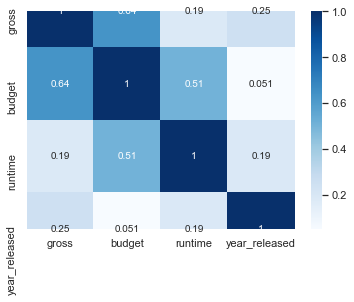

In [16]:
sns.heatmap(correlation_coefficients,annot=True,cmap="Blues")